In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Files to load

city_data_df = pd.read_csv('city_data.csv')
ride_data_df = pd.read_csv('ride_data.csv')


In [2]:
pyber_data_df = pd.merge(ride_data_df,city_data_df, how='left',on=["city", "city"])
ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
city       2375 non-null object
date       2375 non-null object
fare       2375 non-null float64
ride_id    2375 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [3]:
pyber_data_df.head(2)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban


In [4]:
def rejiggersum(df,gb,vals):
    return df.groupby([gb]).sum()[vals]
def rejiggeravg(df,gb,vals):
    return df.groupby([gb]).mean()[vals]
def rejiggercount(df,gb,vals):
    return df.groupby([gb]).count()[vals]


In [5]:
sum_rides_by_type = rejiggercount(pyber_data_df,'type','fare')
sum_drivers_by_type = rejiggersum(city_data_df,'type','driver_count')
sum_fares_by_type = rejiggersum(pyber_data_df,'type','fare')
avg_fare_by_type = rejiggeravg(pyber_data_df,'type','fare')
avg_fare_by_driver = rejiggersum(pyber_data_df,'type','fare')/ rejiggersum(city_data_df,'type','driver_count')

ser = [sum_rides_by_type,sum_drivers_by_type,sum_fares_by_type ,avg_fare_by_type,avg_fare_by_driver]
my_names = ["Total Rides","Total Drivers","Total Fares","Average Fare per Ride","Average Fare per Driver"]

type_summary_df = pd.concat(ser, axis=1, keys=my_names)
del type_summary_df.index.name
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [6]:
type_summary_df["Total Rides"] = type_summary_df["Total Rides"].map("{:,}".format)
type_summary_df["Total Drivers"] = type_summary_df["Total Drivers"].map("{:,}".format)
type_summary_df["Total Fares"] = type_summary_df["Total Fares"].map("${:,.2f}".format)
type_summary_df["Average Fare per Ride"] = type_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
type_summary_df["Average Fare per Driver"] = type_summary_df["Average Fare per Driver"].map("${:,.2f}".format)



In [7]:
type_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [8]:
pyber_data_df.columns = ['City','Date','Fare',
                     'Ride Id','No. Drivers','City Type']

In [9]:
pyber_data_df.set_index("Date") 

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban
...,...,...,...,...,...
2019-04-29 17:04:39,Michaelberg,13.38,8550365057598,6,Rural
2019-01-30 00:05:47,Lake Latoyabury,20.76,9018727594352,2,Rural
2019-02-10 21:03:50,North Jaime,11.11,2781339863778,1,Rural


In [10]:
new_pyber_data_df = pyber_data_df[['Date','City Type','Fare']]

In [11]:
#new_pyber_data_df.set_index("Date") 

In [12]:
new_pyber_data_df['Date'] =  pd.to_datetime(new_pyber_data_df['Date'])

C:\Users\alex_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
#new_pyber_data_df.set_index("Date") 

In [14]:
new_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 3 columns):
Date         2375 non-null datetime64[ns]
City Type    2375 non-null object
Fare         2375 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 74.2+ KB


In [15]:
new_pyber_data_df.head(2)

,Date,City Type,Fare
0,2019-01-14 10:14:22,Urban,13.83
1,2019-03-04 18:24:09,Urban,30.24


In [16]:
fare_by_date_city_df = new_pyber_data_df.groupby(['Date', 'City Type']).sum()['Fare']

In [17]:
fare_by_date_city_df.head(2)

Date                 City Type
2019-01-01 00:08:16  Urban        37.91
2019-01-01 00:46:46  Suburban     47.74
Name: Fare, dtype: float64

In [18]:
fare_by_date_city_df = fare_by_date_city_df.to_frame()

In [19]:
fare_by_date_city_df.head(2)

,,Fare
Date,City Type,
2019-01-01 00:08:16,Urban,37.91
2019-01-01 00:46:46,Suburban,47.74


In [20]:
piv_df = pd.pivot_table(fare_by_date_city_df, values='Fare', index='Date', columns='City Type')

In [21]:
piv_df.head(2)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN


In [22]:
piv2 = piv_df.loc['2019-01-01':'2019-04-28']

In [23]:
piv2.head(2)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN


In [24]:
piv3 = piv2.resample('W').sum()

In [25]:
piv3

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [26]:
plt.style.use('fivethirtyeight')
x = piv3.index
rur = piv3['Rural']
urb = piv3['Urban']
sub = piv3['Suburban']

C:\Users\alex_\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


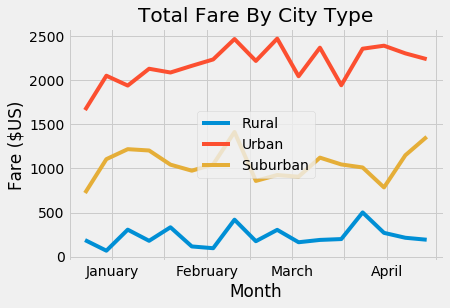

In [27]:
# Create the plot with ax.plt()
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.plot(x, rur, label = 'Rural')
ax.plot(x, urb, label = 'Urban')
ax.plot(x, sub, label = 'Suburban')
monthyearFmt = mdates.DateFormatter('%B')
ax.xaxis.set_major_formatter(monthyearFmt)
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlabel('Month')
plt.ylabel('Fare ($US)')
plt.title('Total Fare By City Type')
ax.legend()
ax